## Word Cloud

In [105]:
all_text = df['transcript'].str.cat(sep=', ')

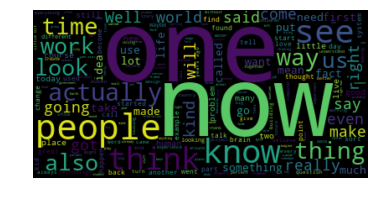

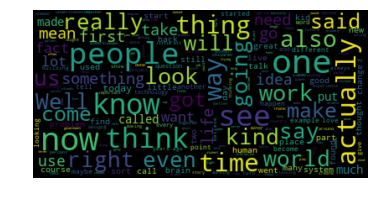

In [106]:
from wordcloud import WordCloud, STOPWORDS
# Read the whole text.
text = all_text

stopwords = set(STOPWORDS)
stopwords.add("ë_")

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(stopwords=stopwords, max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## NMF Topic Clustering

In [22]:
import os
import settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from sklearn.decomposition import NMF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

In [26]:
df = read_data()

In [27]:
content = df['transcript'].as_matrix()

In [28]:
import Stemmer
english_stemmer = Stemmer.Stemmer('en')
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: english_stemmer.stemWords(analyzer(doc))

In [29]:
#vect = TfidfVectorizer(max_features=7000, stop_words='english')
vect = StemmedTfidfVectorizer(min_df=2, stop_words='english', analyzer='word', ngram_range=(1,1))
X = vect.fit_transform(content)

In [30]:
column_names = np.array(vect.get_feature_names())

In [31]:
def words_and_topics(h, words):
    top10 = np.flip(h.argsort(axis = 1), axis=1)[:, :10]
    for topic in top10:
        print(words[topic])

In [32]:
model = NMF(n_components=10, max_iter = 100)
model.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=100,
  n_components=10, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [33]:
w_sk = model.transform(X)
h_sk= model.components_

In [34]:
words_and_topics(h_sk, column_names)

['know' 'peopl' 'like' 'said' 'thing' 'just' 'say' 'think' 'go' 'don']
['planet' 'water' 'earth' 'ocean' 'fish' 'mar' 'speci' 'year' 'sea' 'ice']
['peopl' 'countri' 'govern' 'world' 'africa' 'percent' 'global' 'compani'
 'year' 'dollar']
['cancer' 'cell' 'patient' 'drug' 'diseas' 'tumor' 'health' 'doctor'
 'blood' 'bodi']
['èâ' 'song' 'music' 'sing' 'video' 'choir' 'oh' 'islam' 'loop' 'ice']
['comput' 'design' 'data' 'use' 'thing' 'actual' 'like' 'technolog'
 'machin' 'realli']
['citi' 'build' 'car' 'design' 'space' 'urban' 'peopl' 'communiti'
 'architectur' 'street']
['women' 'men' 'girl' 'woman' 'children' 'stori' 'mother' 'boy' 'famili'
 'sex']
['robot' 'machin' 'like' 'human' 'leg' 'ai' 'intellig' 'autonom' 'use' 'go']
['brain' 'neuron' 'cell' 'conscious' 'human' 'bodi' 'activ' 'anim' 'disord'
 'mind']


## See Topic modeling by Moral Label

In [69]:
df[['Harm','Authority', 'Ingroup', 'Purity', 'Fairness']].quantile(.75)

Harm         0.3175
Authority    0.3000
Ingroup      0.4100
Purity       0.1100
Fairness     0.0700
Name: 0.75, dtype: float64

In [70]:
df['Harm_label'] = np.where(df['Harm']>0.3175, 1, 0)
df['Authority_label'] = np.where(df['Authority']>0.30, 1, 0)
df['Ingroup_label'] = np.where(df['Ingroup']>0.41, 1, 0)
df['Purity_label'] = np.where(df['Purity']>0.11, 1, 0)
df['Fairness_label'] = np.where(df['Fairness']>0.07, 1, 0)

In [88]:
content = df['transcript'][df['Harm_label'] == 1].as_matrix()

In [89]:
vect = StemmedTfidfVectorizer(min_df=2, stop_words='english', analyzer='word', ngram_range=(1,1))
X = vect.fit_transform(content)
column_names = np.array(vect.get_feature_names())

model = NMF(n_components=6, max_iter = 100)
model.fit(X)
w_sk = model.transform(X)
h_sk= model.components_
words_and_topics(h_sk, column_names)

['peopl' 'like' 'know' 'think' 'thing' 'say' 'just' 'said' 'go' 'don']
['patient' 'health' 'care' 'doctor' 'medic' 'hospit' 'surgeri' 'clinic'
 'healthcar' 'nurs']
['women' 'girl' 'men' 'sex' 'woman' 'sexual' 'violenc' 'mother' 'children'
 'stori']
['peopl' 'govern' 'countri' 'war' 'citi' 'world' 'secur' 'conflict' 'use'
 'state']
['ocean' 'water' 'sea' 'fish' 'coral' 'shark' 'anim' 'whale' 'climat'
 'reef']
['cell' 'cancer' 'diseas' 'drug' 'stem' 'brain' 'vaccin' 'immun' 'gene'
 'mosquito']


In [90]:
content = df['transcript'][df['Ingroup_label'] == 1].as_matrix()

In [91]:
vect = StemmedTfidfVectorizer(min_df=2, stop_words='english', analyzer='word', ngram_range=(1,1))
X = vect.fit_transform(content)
column_names = np.array(vect.get_feature_names())

model = NMF(n_components=6, max_iter = 100)
model.fit(X)
w_sk = model.transform(X)
h_sk= model.components_
words_and_topics(h_sk, column_names)

['peopl' 'like' 'know' 'think' 'said' 'thing' 'just' 'want' 'don' 'time']
['women' 'girl' 'school' 'men' 'educ' 'famili' 'children' 'father' 'mother'
 'woman']
['world' 'govern' 'countri' 'china' 'global' 'state' 'democraci' 'polit'
 'peopl' 'econom']
['health' 'patient' 'care' 'doctor' 'children' 'diseas' 'medic' 'percent'
 'hiv' 'famili']
['citi' 'design' 'build' 'communiti' 'peopl' 'space' 'hous' 'urban'
 'architectur' 'neighborhood']
['data' 'like' 'look' 'inform' 'actual' 'realli' 'thing' 'human' 'use'
 'think']


In [92]:
content = df['transcript'][df['Authority_label'] == 1].as_matrix()

In [93]:
vect = StemmedTfidfVectorizer(min_df=2, stop_words='english', analyzer='word', ngram_range=(1,1))
X = vect.fit_transform(content)
column_names = np.array(vect.get_feature_names())

model = NMF(n_components=6, max_iter = 100)
model.fit(X)
w_sk = model.transform(X)
h_sk= model.components_
words_and_topics(h_sk, column_names)

['know' 'said' 'peopl' 'like' 'say' 'think' 'want' 'just' 'thing' 'love']
['women' 'men' 'girl' 'woman' 'sex' 'sexual' 'gender' 'femal' 'feminist'
 'equal']
['peopl' 'govern' 'polit' 'countri' 'world' 'democraci' 'citi' 'global'
 'state' 'compani']
['school' 'teacher' 'kid' 'educ' 'student' 'children' 'learn' 'class'
 'teach' 'classroom']
['brain' 'robot' 'design' 'comput' 'thing' 'control' 'use' 'like' 'actual'
 'technolog']
['health' 'africa' 'doctor' 'patient' 'african' 'hiv' 'babi' 'mental'
 'medic' 'care']


In [94]:
content = df['transcript'][df['Fairness_label'] == 1].as_matrix()

In [95]:
vect = StemmedTfidfVectorizer(min_df=2, stop_words='english', analyzer='word', ngram_range=(1,1))
X = vect.fit_transform(content)
column_names = np.array(vect.get_feature_names())

model = NMF(n_components=6, max_iter = 100)
model.fit(X)
w_sk = model.transform(X)
h_sk= model.components_
words_and_topics(h_sk, column_names)

['like' 'peopl' 'thing' 'think' 'know' 'just' 'go' 'realli' 'time' 'want']
['women' 'men' 'girl' 'woman' 'sex' 'boy' 'gender' 'daughter' 'equal'
 'said']
['countri' 'peopl' 'percent' 'world' 'compani' 'global' 'dollar' 'year'
 'market' 'money']
['cell' 'brain' 'gene' 'plant' 'human' 'genom' 'fli' 'genet' 'drug' 'earth']
['citi' 'design' 'build' 'space' 'new' 'street' 'architectur' 'car' 'built'
 'use']
['peopl' 'muslim' 'democraci' 'polit' 'islam' 'prison' 'war' 'govern' 'law'
 'countri']


In [96]:
content = df['transcript'][df['Purity_label'] == 1].as_matrix()

In [97]:
vect = StemmedTfidfVectorizer(min_df=2, stop_words='english', analyzer='word', ngram_range=(1,1))
X = vect.fit_transform(content)
column_names = np.array(vect.get_feature_names())

model = NMF(n_components=6, max_iter = 100)
model.fit(X)
w_sk = model.transform(X)
h_sk= model.components_
words_and_topics(h_sk, column_names)

['peopl' 'like' 'just' 'know' 'think' 'thing' 'say' 'go' 'realli' 'said']
['cancer' 'tumor' 'patient' 'doctor' 'diseas' 'pancreat' 'drug' 'blood'
 'bodi' 'protein']
['water' 'citi' 'world' 'oil' 'use' 'plant' 'energi' 'climat' 'year'
 'ocean']
['women' 'peopl' 'health' 'countri' 'girl' 'school' 'year' 'children' 'men'
 'communiti']
['èâ' 'loop' 'islam' 'arab' 'compass' '99' 'song' 'stori' 'music' 'brisban']
['cell' 'brain' 'stem' 'diseas' 'drug' 'actual' 'tissu' 'patient' 'neuron'
 'organ']


In [82]:
df['Moral'].quantile(.75)

1.5

In [83]:
df['Moral_label'] = np.where(df['Moral']>1.5, 1, 0)

In [84]:
content = df['transcript'][df['Moral_label'] == 1].as_matrix()

In [87]:
vect = StemmedTfidfVectorizer(min_df=2, stop_words='english', analyzer='word', ngram_range=(1,1))
X = vect.fit_transform(content)
column_names = np.array(vect.get_feature_names())

model = NMF(n_components=6, max_iter = 100)
model.fit(X)
w_sk = model.transform(X)
h_sk= model.components_
words_and_topics(h_sk, column_names)

['peopl' 'think' 'like' 'thing' 'just' 'don' 'know' 'go' 'realli' 'actual']
['famili' 'peopl' 'school' 'said' 'children' 'father' 'kid' 'know' 'mother'
 'year']
['cell' 'diseas' 'health' 'patient' 'cancer' 'drug' 'doctor' 'brain' 'care'
 'stem']
['citi' 'govern' 'countri' 'world' 'global' 'peopl' 'state' 'china' 'war'
 'nation']
['women' 'men' 'girl' 'sex' 'woman' 'sexual' 'gender' 'equal' 'male'
 'violenc']
['compass' 'god' 'religi' 'religion' 'muslim' 'islam' 'èâ' 'peopl' 'world'
 'faith']


## Get all words for Tableau

In [98]:
content = df['transcript'].as_matrix()